# Subsetting and Descriptive Stats

## Before your start:
   - Remember that you just need to do one of the challenges.
   - Keep in mind that you need to use some of the functions you learned in the previous lessons.
   - All datasets are provided in IronHack's database.
   - Elaborate your codes and outputs as much as you can.
   - Try your best to answer the questions and complete the tasks and most importantly: enjoy the process!
   
#### Import all the necessary libraries here:

In [ ]:
# import libraries here

# [ONLY ONE MANDATORY] Challenge 1
#### In this challenge we will use the `Temp_States`  dataset. 

#### First import it into a dataframe called `temp`.

In [ ]:
# your code here

#### Print `temp`.

In [ ]:
# your code here

#### Explore the data types of the *temp* dataframe. What types of data do we have? Comment your result.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""

#### Select the rows where state is New York.

In [ ]:
# your code here

#### What is the average temperature of cities in New York?

In [ ]:
# your code here

#### Which states and cities have a temperature above 15 degrees Celsius?

In [ ]:
# your code here

#### Now, return only the cities that have a temperature above 15 degrees Celsius.

In [ ]:
# your code here

#### Which cities have a temperature above 15 degrees Celcius and below 20 degrees Celsius?

**Hint**: First, write the condition. Then, select the rows.

In [ ]:
# your code here

#### Find the mean and standard deviation of the temperature of each state.

In [ ]:
# your code here

# [ONLY ONE MANDATORY]  Challenge 2

#### Load the `employees` dataset into a dataframe. Call the dataframe `employees`.

In [ ]:
# your code here

#### Explore the data types of the `employees` dataframe. Comment your results.

In [ ]:
# your code here

In [ ]:
"""
your comments here
"""

#### What's the average salary in this company?

In [ ]:
# your code here

#### What's the highest salary?

In [ ]:
# your code here

#### What's the lowest salary?

In [ ]:
# your code here

#### Who are the employees with the lowest salary?

In [ ]:
# your code here

#### Find all the information about an employee called David.

In [ ]:
# your code here

#### Could you return only David's salary?

In [ ]:
# your code here

#### Print all the rows where job title is associate.

In [ ]:
# your code here

#### Print the first 3 rows of your dataframe.
**Tip**: There are 2 ways to do it. Do it both ways.

In [ ]:
# Method 1
# your code here

In [ ]:
# Method 2
# your code here

#### Find the employees whose title is associate and whose salary is above 55.

In [ ]:
# your code here

#### Group the employees by number of years of employment. What are the average salaries in each group?

In [ ]:
# your code here

####  What is the average salary per title?

In [ ]:
# your code here

####  Find the salary quartiles.


In [ ]:
# your code here

#### Is the mean salary different per gender?

In [ ]:
# your code here

#### Find the minimum, mean and maximum of all numeric columns for each company department.



In [ ]:
# your code here

#### Bonus Question:  for each department, compute the difference between the maximum and the minimum salary.
**Hint**: try using `agg` or `apply` combined with `lambda` functions.

In [ ]:
# your code here

# [ONLY ONE MANDATORY] Challenge 3
#### Open the `Orders` dataset. Name your dataset `orders`.

In [17]:
# your code here
import pandas as pd
orders=pd.read_csv('/Users/guillaumeaubert/Documents/Ironhack/Module2/Week1/Day3_Statistic intro/lab-subsetting-and-descriptive-stats/your-code/Orders.csv')

orders.head()

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
0,0,536365,85123A,2010,12,3,8,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,1,536365,71053,2010,12,3,8,white metal lantern,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,2,536365,84406B,2010,12,3,8,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,3,536365,84029G,2010,12,3,8,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,4,536365,84029E,2010,12,3,8,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


#### Explore your dataset by looking at the data types and summary statistics. Comment your results.

In [5]:
# your code here
orders.dtypes
orders.describe()

,Unnamed: 0,InvoiceNo,year,month,day,hour,Quantity,UnitPrice,CustomerID,amount_spent
count,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000,397924.000000
mean,278465.221859,560617.126645,2010.934259,7.612537,3.614555,12.728247,13.021823,3.116174,15294.315171,22.394749
std,152771.368303,13106.167695,0.247829,3.416527,1.928274,2.273535,180.420210,22.096788,1713.169877,309.055588
min,0.000000,536365.000000,2010.000000,1.000000,1.000000,6.000000,1.000000,0.000000,12346.000000,0.000000
25%,148333.750000,549234.000000,2011.000000,5.000000,2.000000,11.000000,2.000000,1.250000,13969.000000,4.680000
50%,284907.500000,561893.000000,2011.000000,8.000000,3.000000,13.000000,6.000000,1.950000,15159.000000,11.800000
75%,410079.250000,572090.000000,2011.000000,11.000000,5.000000,14.000000,12.000000,3.750000,16795.000000,19.800000
max,541908.000000,581587.000000,2011.000000,12.000000,7.000000,20.000000,80995.000000,8142.750000,18287.000000,168469.600000


In [ ]:
"""
The orders total prices and quantity are very dispersed because the mean and the std are very different
397 924 items have been purchased
"""

####  What is the average purchase price?

In [6]:
# your code here
orders['amount_spent'].mean()

22.39474850474768

#### What are the highest and lowest purchase prices? 

In [8]:
# your code here
print(orders['amount_spent'].max(), orders['amount_spent'].min())

168469.6 0.0


#### Select all the customers from Spain.
**Hint**: Remember that you are not asked to find orders from Spain but customers. A customer might have more than one order associated. 

In [27]:
# your code here
filter = orders['Country'] == 'Spain'
orders_spain=orders.where(filter).dropna()
spain_customers=orders_spain['CustomerID'].unique()
spain_customers = set([int(id) for id in spain_customer])
spain_customers

{12354,
 12417,
 12421,
 12442,
 12445,
 12448,
 12450,
 12454,
 12455,
 12462,
 12484,
 12502,
 12507,
 12510,
 12538,
 12539,
 12540,
 12541,
 12544,
 12545,
 12546,
 12547,
 12548,
 12550,
 12551,
 12556,
 12557,
 12596,
 12597,
 17097}

#### How many customers do we have in Spain?

In [29]:
# your code here
print(len(spain_customers), "customers in Spain")

30 customers in Spain


#### Select all the customers who have bought more than 50 items.
**Hint**: Remember that you are not asked to find orders with more than 50 items but customers who bought more than 50 items. A customer with two orders of 30 items each should appear in the selection.

In [41]:
# your code here
orders.head()

customers_items=pd.DataFrame(orders.groupby('CustomerID')['Quantity'].sum())
customers_items

filter = customers_items['Quantity'] > 50
customers_items_50=customers_items.where(filter).dropna()
customers_items_50=customers_items_50['Quantity'].unique()
customers_items_50 = set([int(id) for id in customers_items_50])
len(customers_items_50)

1720

#### Select orders from Spain that include more than 50 items.

In [53]:
# your code here
orders_spain=pd.DataFrame(orders_spain.groupby('InvoiceNo')['Quantity'].sum())
orders_spain

filter = orders_spain['Quantity'] > 50
orders_spain_50=orders_spain.where(filter).dropna()
orders_spain_50=orders_spain['Quantity'].unique()
orders_spain_50
orders_spain_50 = set([int(id) for id in orders_spain_50])
orders_spain_50

{3,
 5,
 7,
 11,
 25,
 33,
 48,
 49,
 50,
 59,
 62,
 64,
 67,
 75,
 77,
 88,
 92,
 97,
 100,
 103,
 104,
 107,
 109,
 117,
 131,
 136,
 145,
 152,
 156,
 158,
 166,
 171,
 173,
 175,
 177,
 182,
 191,
 192,
 193,
 216,
 219,
 227,
 230,
 234,
 239,
 243,
 249,
 261,
 267,
 287,
 288,
 294,
 300,
 317,
 318,
 323,
 327,
 335,
 346,
 400,
 424,
 445,
 446,
 475,
 512,
 530,
 550,
 565,
 569,
 608,
 630,
 643,
 649,
 675,
 724,
 747,
 800,
 920,
 1006,
 1008,
 1484,
 1506}

#### Select all free orders.

In [55]:
# your code here
filter = orders['amount_spent'] == 0
orders_free=orders.where(filter).dropna()
invoice_free=orders_free['InvoiceNo'].unique()
invoice_free = set([int(id) for id in invoice_free])

invoice_free

{537197,
 539263,
 539722,
 540372,
 541109,
 543599,
 547417,
 548318,
 548871,
 550188,
 553000,
 554037,
 561284,
 561669,
 561916,
 562973,
 564651,
 568158,
 568384,
 569716,
 571035,
 572893,
 574138,
 574175,
 574252,
 574469,
 574879,
 574920,
 575579,
 577129,
 577168,
 577314,
 577696,
 578841}

#### Select all orders whose description starts with `lunch bag`.
**Hint**: use string functions.

In [62]:
# your code here

filter = orders['Description'].str.startswith('lunch bag')
orders_lb=orders.where(filter).dropna()
lb_orders_ID=orders_lb['InvoiceNo'].unique()
lb_orders_ID = set([int(id) for id in lb_orders_ID])

lb_orders_ID

{557057,
 565250,
 548870,
 557064,
 557067,
 557069,
 565261,
 540700,
 573485,
 548920,
 557113,
 573496,
 557115,
 573500,
 557117,
 573501,
 557122,
 557123,
 573509,
 565318,
 565320,
 557129,
 557132,
 565324,
 540750,
 565329,
 557145,
 557147,
 573544,
 548978,
 573556,
 565366,
 548984,
 548993,
 573576,
 573579,
 565388,
 540813,
 540816,
 573584,
 573587,
 549014,
 557210,
 557211,
 557217,
 565410,
 540835,
 565411,
 540838,
 557222,
 557223,
 557225,
 557232,
 557233,
 549044,
 565432,
 565434,
 549052,
 565438,
 557247,
 565439,
 565442,
 565447,
 565451,
 565453,
 557262,
 557263,
 565458,
 565460,
 557274,
 565466,
 557277,
 557278,
 565473,
 557283,
 565475,
 565478,
 565479,
 540907,
 549099,
 549101,
 557293,
 557295,
 557303,
 549115,
 549120,
 557312,
 557322,
 565519,
 557328,
 557330,
 540953,
 540957,
 549153,
 557349,
 557350,
 565541,
 540976,
 573748,
 540993,
 573762,
 573763,
 549189,
 540999,
 549193,
 565579,
 541005,
 573774,
 541012,
 557397,
 549206,
 

#### Select all `lunch bag` orders made in 2011.

In [71]:
# your code here
orders_lb['year']=orders_lb['year'].astype(int)

filter = orders_lb['year'] == 2011

orders_lb_2011=orders_lb.where(filter).dropna()
orders_lb_2011

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
26340,42678.0,540015.0,20725,2011.0,1.0,2.0,11.0,lunch bag red retrospot,10.0,2011-01-04 11:40:00,1.65,13319.0,United Kingdom,16.50
26341,42679.0,540015.0,20726,2011.0,1.0,2.0,11.0,lunch bag woodland,10.0,2011-01-04 11:40:00,1.65,13319.0,United Kingdom,16.50
26512,42851.0,540023.0,22382,2011.0,1.0,2.0,12.0,lunch bag spaceboy design,2.0,2011-01-04 12:58:00,1.65,15039.0,United Kingdom,3.30
26513,42852.0,540023.0,20726,2011.0,1.0,2.0,12.0,lunch bag woodland,1.0,2011-01-04 12:58:00,1.65,15039.0,United Kingdom,1.65
26860,43616.0,540098.0,22384,2011.0,1.0,2.0,15.0,lunch bag pink polkadot,1.0,2011-01-04 15:50:00,1.65,16241.0,United Kingdom,1.65
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
397465,540436.0,581486.0,23207,2011.0,12.0,5.0,9.0,lunch bag alphabet design,10.0,2011-12-09 09:38:00,1.65,17001.0,United Kingdom,16.50
397713,541695.0,581538.0,20727,2011.0,12.0,5.0,11.0,lunch bag black skull.,1.0,2011-12-09 11:34:00,1.65,14446.0,United Kingdom,1.65
397714,541696.0,581538.0,20725,2011.0,12.0,5.0,11.0,lunch bag red retrospot,1.0,2011-12-09 11:34:00,1.65,14446.0,United Kingdom,1.65
397877,541862.0,581581.0,23681,2011.0,12.0,5.0,12.0,lunch bag red vintage doily,10.0,2011-12-09 12:20:00,1.65,17581.0,United Kingdom,16.50


#### Show the frequency distribution of the amount spent in Spain.

/Users/guillaumeaubert/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


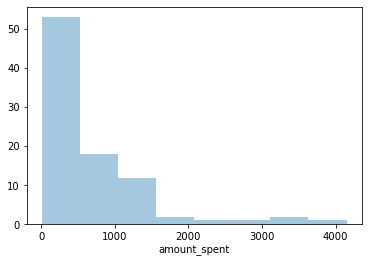

In [78]:
# your code here
import seaborn as sns

filter = orders['Country'] == 'Spain'
orders_spain=orders.where(filter).dropna()
orders_spain_price=pd.DataFrame(orders_spain.groupby('InvoiceNo')['Quantity','amount_spent'].sum())
sorted_orders=orders_spain_price['amount_spent'].sort_values(ascending=False)

sns.distplot(sorted_orders,bins=8,kde=False)

#### Select all orders made in the month of August.

In [87]:
# your code here
#orders['month']=orders['month'].astype(int)
filter = orders['month'] == 8
orders_august=orders.where(filter).dropna()
orders_august

,Unnamed: 0,InvoiceNo,StockCode,year,month,day,hour,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount_spent
199475,285421.0,561904.0,22075,2011.0,8.0,1.0,8.0,6 ribbons elegant christmas,96.0,2011-08-01 08:30:00,1.45,17941.0,United Kingdom,139.20
199476,285422.0,561904.0,85049E,2011.0,8.0,1.0,8.0,scandinavian reds ribbons,156.0,2011-08-01 08:30:00,1.06,17941.0,United Kingdom,165.36
199477,285423.0,561905.0,21385,2011.0,8.0,1.0,9.0,ivory hanging decoration heart,24.0,2011-08-01 09:31:00,0.85,14947.0,United Kingdom,20.40
199478,285424.0,561905.0,84970L,2011.0,8.0,1.0,9.0,single heart zinc t-light holder,12.0,2011-08-01 09:31:00,0.95,14947.0,United Kingdom,11.40
199479,285425.0,561905.0,84970S,2011.0,8.0,1.0,9.0,hanging heart zinc t-light holder,12.0,2011-08-01 09:31:00,0.85,14947.0,United Kingdom,10.20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
226483,320688.0,565067.0,22644,2011.0,8.0,3.0,17.0,ceramic cherry cake money bank,2.0,2011-08-31 17:16:00,1.45,15856.0,United Kingdom,2.90
226484,320689.0,565067.0,22645,2011.0,8.0,3.0,17.0,ceramic heart fairy cake money bank,2.0,2011-08-31 17:16:00,1.45,15856.0,United Kingdom,2.90
226485,320690.0,565067.0,22637,2011.0,8.0,3.0,17.0,piggy bank retrospot,2.0,2011-08-31 17:16:00,2.55,15856.0,United Kingdom,5.10
226486,320691.0,565067.0,22646,2011.0,8.0,3.0,17.0,ceramic strawberry cake money bank,2.0,2011-08-31 17:16:00,1.45,15856.0,United Kingdom,2.90


#### Find the number of orders made by each country in the month of August.
**Hint**: Use value_counts().

In [89]:
# your code here
orders_august.groupby('Country')['InvoiceNo'].count()

Country
Australia            107
Austria               88
Belgium              194
Canada                 5
Channel Islands      140
Denmark               16
EIRE                 593
Finland               61
France               569
Germany              795
Iceland               22
Israel               171
Italy                 95
Malta                 55
Netherlands          280
Norway                77
Poland                17
Portugal              41
Spain                252
Sweden                40
Switzerland          267
United Kingdom     23105
Unspecified           23
Name: InvoiceNo, dtype: int64

#### What's the  average amount of money spent by country?

In [90]:
orders.groupby('Country')['amount_spent'].mean()

Country
Australia               116.895620
Austria                  25.624824
Bahrain                  32.258824
Belgium                  20.283772
Brazil                   35.737500
Canada                   24.280662
Channel Islands          27.340160
Cyprus                   22.134169
Czech Republic           33.069600
Denmark                  49.882474
EIRE                     36.687745
European Community       21.670833
Finland                  32.913985
France                   25.056827
Germany                  25.311562
Greece                   32.831172
Iceland                  23.681319
Israel                   29.119718
Italy                    23.064960
Japan                   116.561900
Lebanon                  37.641778
Lithuania                47.458857
Malta                    24.335625
Netherlands             120.798282
Norway                   33.736418
Poland                   22.226212
Portugal                 22.872702
RSA                      17.281207
Saudi Arabia

#### What's the most expensive item?

In [95]:
# your code here


filter = orders['UnitPrice']==orders['UnitPrice'].max()
orders_max=orders.where(filter).dropna()
set(orders_max['Description'])

{'i love london baby gift set',
 'spaceboy rocket lolly makers',
 'garden path notebook ',
 'multicolour polkadot plate',
 'baby boom ribbons ',
 'ivory wicker heart small',
 'etched glass coaster',
 'playing cards keep calm & carry on',
 'star portable table light ',
 'carousel ponies baby bib',
 'heart string memo holder hanging',
 'ant copper pink boudicca bracelet',
 'miseltoe heart wreath ',
 'childs garden fork pink',
 'zinc heart lattice charger small',
 'pantry 3 hook rolling pin hanger',
 'set of 6 t-lights toadstools',
 'travel card wallet keep calm',
 'classical rose table lamp',
 'vintage christmas tablecloth',
 'fine wicker heart ',
 'wrap poppies  design',
 'heart shaped holly wreath',
 'cat and bird wall art',
 'polyester filler pad 40x40cm',
 'hanging spring flower egg small',
 'wooden union jack bunting',
 'envelope 50 curious images',
 'pastel pink photo album ',
 'jumbo bag vintage christmas ',
 'set of 12 t-lights vintage doiley',
 'colour glass t-light holder hangi

#### What is the average amount spent per year?

In [97]:
# your code here
orders.groupby('year')['amount_spent'].mean()

year
2010    21.892733
2011    22.430074
Name: amount_spent, dtype: float64